In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
wines= pd.read_csv('winequality-red.csv')

In [3]:
wines = wines.drop(['quality'], axis=1) #dropping the class label

In [4]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [5]:
#exploring the dataset. 

In [6]:
wines.shape

(1599, 11)

In [7]:
wines.dtypes
#all columsn are numerical, no need to convert any data types

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
dtype: object

In [8]:
wines.isna().sum() #no missing values to remove

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

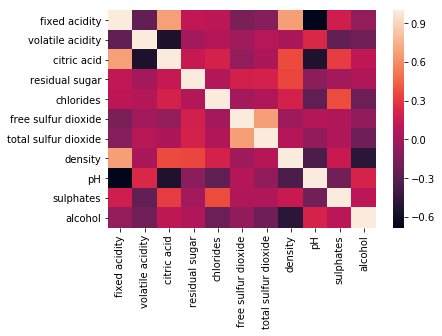

In [9]:
sns.heatmap(wines.corr()) #checking for multicollinearity. There are several pairs that we need to double-check. 

In [10]:
correlation = wines.corr().abs() #the highest correlation is 68%, we don't need to worry at the moment about multicollinearity
correlation.unstack().sort_values(ascending=False)

alcohol               alcohol                 1.000000
sulphates             sulphates               1.000000
volatile acidity      volatile acidity        1.000000
citric acid           citric acid             1.000000
residual sugar        residual sugar          1.000000
chlorides             chlorides               1.000000
total sulfur dioxide  total sulfur dioxide    1.000000
density               density                 1.000000
pH                    pH                      1.000000
free sulfur dioxide   free sulfur dioxide     1.000000
fixed acidity         fixed acidity           1.000000
pH                    fixed acidity           0.682978
fixed acidity         pH                      0.682978
                      citric acid             0.671703
citric acid           fixed acidity           0.671703
fixed acidity         density                 0.668047
density               fixed acidity           0.668047
free sulfur dioxide   total sulfur dioxide    0.667666
total sulf

In [11]:
wines.describe().T #let's check for outliers

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


[Text(0, 0, 'fixed acidity'),
 Text(0, 0, 'volatile acidity'),
 Text(0, 0, 'citric acid'),
 Text(0, 0, 'residual sugar'),
 Text(0, 0, 'chlorides'),
 Text(0, 0, 'free sulfur dioxide'),
 Text(0, 0, 'total sulfur dioxide'),
 Text(0, 0, 'density'),
 Text(0, 0, 'pH'),
 Text(0, 0, 'sulphates'),
 Text(0, 0, 'alcohol')]

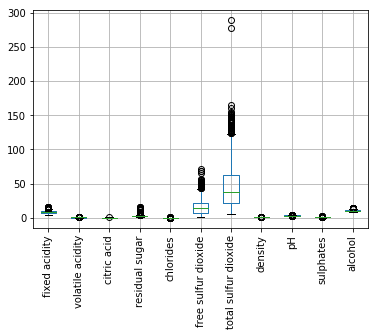

In [12]:
ax = wines.boxplot() #let's remove the outliers for Total Sulphur dioxide and Free sulphur dioxide columns
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [13]:
from scipy.stats import iqr
def remove_outliers(df, x):
    p_75 = np.percentile(df[x], 75)    
    upper_bound = p_75 + 1.5 * iqr(df[x])
    df = df[df[x]<=upper_bound]
    return df

In [14]:
cols =["free sulfur dioxide", "total sulfur dioxide"]
for i in cols:
    wines = remove_outliers(wines, i)

In [15]:
wines.shape

(1505, 11)

In [16]:
#data distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EC8F0F4048>,
      dtype=object)

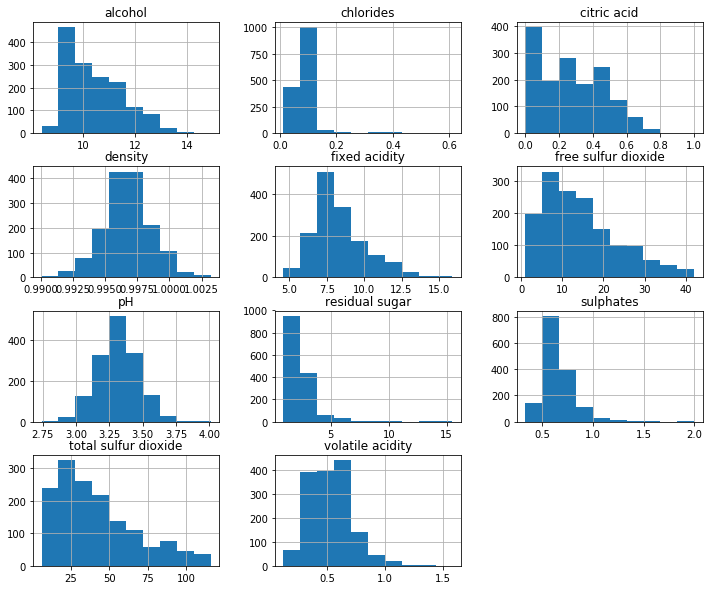

In [17]:
wines.hist(figsize = (12,10))

In [18]:
# now to unsupervised learning 

In [19]:
#preprocessing data

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(wines)
wine_scale = scaler.transform(wines)
wine_scale

array([[-0.52699769,  0.96700884, -1.36410461, ...,  1.2610936 ,
        -0.60764526, -0.98589278],
       [-0.30130756,  1.97202579, -1.36410461, ..., -0.73905332,
         0.15598103, -0.61175879],
       [-0.30130756,  1.30201449, -1.1611259 , ..., -0.35192811,
        -0.03492554, -0.61175879],
       ...,
       [-1.14764553, -0.09384239, -0.7044238 , ...,  0.68040578,
         0.6014297 ,  0.51064318],
       [-1.37333565,  0.65992032, -0.75516847, ...,  1.64821881,
         0.3468876 , -0.2376248 ],
       [-1.31691312, -1.2105279 ,  1.02089526, ...,  0.48684318,
         0.02870998,  0.51064318]])

In [21]:
#now let's apply different models to our dataset.

In [22]:
# first, k-Means

In [23]:
from sklearn.cluster import KMeans # we try different k-s and find the optimum one. 
X = wine_scale
kmeans = KMeans(n_clusters=2).fit(X)

In [24]:
wines['clusters'] = kmeans.labels_
wines['clusters'].value_counts() 

1    940
0    565
Name: clusters, dtype: int64

In [25]:
from sklearn.metrics import silhouette_score
y_pred = kmeans.predict(X)
score = silhouette_score(X, y_pred, metric='euclidean')
score

0.2125815514210999

<bound method Visualizer.poof of KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001EC8FFD5DD8>,
                 k=None, metric=None, model=None, timings=True)>

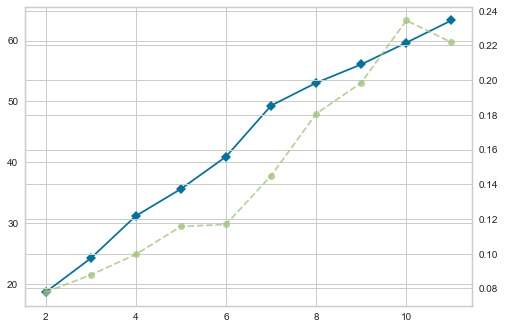

In [26]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))
visualizer.fit(X)
visualizer.poof

In [27]:
#elbow method doesn't make much sense for us with to evaluate the right number of k. 

In [28]:
#let's try gap statistics

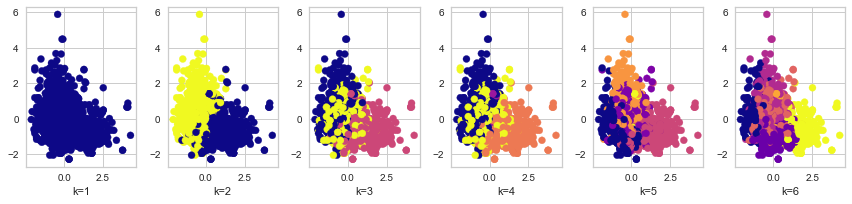

In [29]:
plt.figure(figsize=(12, 3))
for k in range(1,7):
    kmeans = KMeans(n_clusters=k)
    t = kmeans.fit_predict(X)
    plt.subplot(1,6,k)
    plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='plasma')
    plt.xlabel('k='+str(k))
plt.tight_layout()
plt.show()

In [30]:
# looks like k=2 gives the best outcome in this case

In [31]:
#dbscan

In [32]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.4).fit(X)
wines['DBSCAN'] = dbscan.labels_

In [33]:
score = silhouette_score(X, wines['DBSCAN'], metric='euclidean')
score

-0.07452031446277381

In [34]:
wines['DBSCAN'].value_counts() #dbscan might not be the best model to use on this dataset. 

-1    1499
 0       6
Name: DBSCAN, dtype: int64

In [35]:
# let's apply PCA transform

Text(0, 0.5, 'PCA 2')

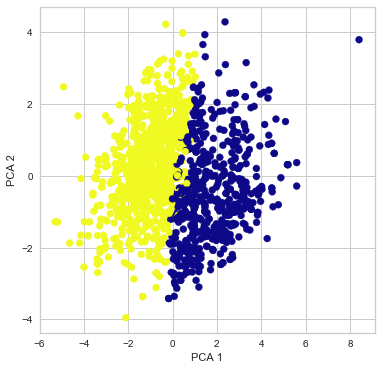

In [52]:
#first to k-means
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)
pca_X = pca.transform(X)

fig = plt.figure(figsize=(6, 6))

plt.scatter(pca_X[:, 0], pca_X[:, 1], c = wines['clusters'], cmap='plasma')
plt.xlabel("PCA 1")
plt.ylabel("PCA 2") #k=2 makes sense in this data

Text(0, 0.5, 'PCA 2')

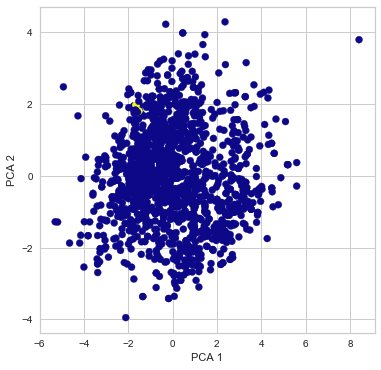

In [53]:
# now applying PCA to DBSCAN
pca = PCA()
pca.fit(X)
pca_X = pca.transform(X)

fig = plt.figure(figsize=(6, 6))

plt.scatter(pca_X[:, 0], pca_X[:, 1], c = wines['DBSCAN'], cmap='plasma')
plt.xlabel("PCA 1")
plt.ylabel("PCA 2") #another proof that dbscan doenst work here

In [37]:
# T-SNE plots showing clusters at a variety of perplexities

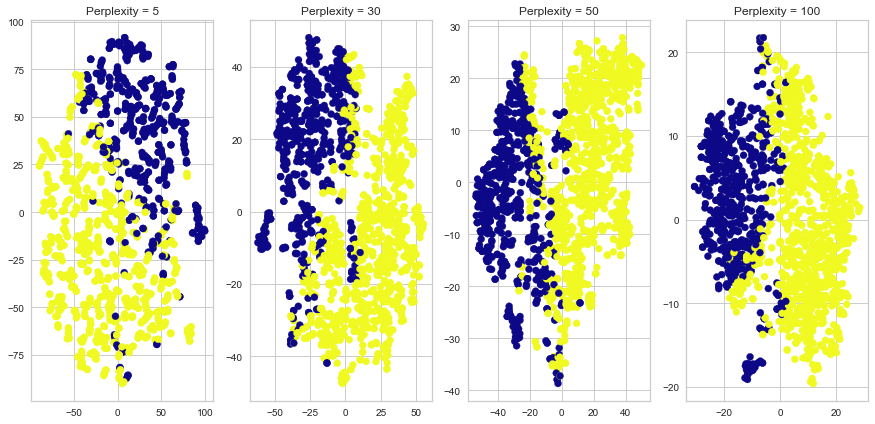

In [38]:
from sklearn.manifold import TSNE

fig, ax = plt.subplots(1, 4, figsize=(15, 7))
for i, perp in enumerate([5, 30, 50, 100]):
    tsne = TSNE(perplexity=perp)
    x_embedded = tsne.fit_transform(X)
    ax[i].scatter(x_embedded[:, 0], x_embedded[:, 1], c=wines['clusters'], cmap='plasma')
    ax[i].set_title("Perplexity = {}".format(perp))
    
plt.show() #tsne is not working for us in this case

In [39]:
# now let's try to make sense of our 2 clusters

In [57]:
wines=wines.drop("DBSCAN", axis=1)
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,clusters
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1


In [58]:
wines.groupby('clusters').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
clusters,,,,,,,,,,,
0,9.962832,0.411867,0.463912,2.664513,0.099667,12.322124,35.438938,0.997652,3.203416,0.738531,10.642065
1,7.355000,0.595894,0.151553,2.340479,0.079506,16.042021,45.220213,0.996155,3.381340,0.605574,10.341046


In [63]:
wines_0 = wines[wines["clusters"]==0]
wines_1 = wines[wines["clusters"]==1]

In [64]:
wines_0.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,clusters
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.0
mean,9.962832,0.411867,0.463912,2.664513,0.099667,12.322124,35.438938,0.997652,3.203416,0.738531,10.642065,0.0
std,1.629188,0.130397,0.124287,1.410753,0.071214,8.233017,23.161135,0.001863,0.116504,0.187962,1.076450,0.0
min,5.600000,0.120000,0.170000,1.300000,0.038000,1.000000,6.000000,0.993400,2.740000,0.420000,8.400000,0.0
25%,8.800000,0.320000,0.390000,2.000000,0.071000,6.000000,18.000000,0.996400,3.140000,0.610000,9.700000,0.0
50%,9.900000,0.400000,0.470000,2.300000,0.082000,10.000000,28.000000,0.997600,3.210000,0.700000,10.500000,0.0
75%,10.900000,0.490000,0.530000,2.800000,0.096000,17.000000,47.000000,0.998800,3.280000,0.820000,11.400000,0.0
max,15.900000,1.025000,1.000000,15.500000,0.611000,42.000000,116.000000,1.003200,3.540000,2.000000,14.900000,0.0


In [65]:
wines_1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,clusters
count,940.00000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.0
mean,7.35500,0.595894,0.151553,2.340479,0.079506,16.042021,45.220213,0.996155,3.381340,0.605574,10.341046,1.0
std,0.94049,0.168738,0.127661,1.014531,0.020796,9.024437,26.577301,0.001638,0.135835,0.108240,1.049765,0.0
min,4.60000,0.160000,0.000000,0.900000,0.012000,3.000000,7.000000,0.990070,2.880000,0.330000,9.000000,1.0
25%,6.80000,0.490000,0.030000,1.800000,0.069750,9.000000,24.000000,0.995300,3.300000,0.540000,9.500000,1.0
50%,7.30000,0.590000,0.130000,2.100000,0.078000,15.000000,39.000000,0.996300,3.370000,0.590000,10.000000,1.0
75%,7.90000,0.686250,0.240000,2.500000,0.086000,21.000000,62.000000,0.997200,3.460000,0.652500,11.000000,1.0
max,10.60000,1.580000,0.660000,12.900000,0.267000,42.000000,115.000000,1.001000,4.010000,1.080000,14.000000,1.0


In [73]:
#let's look at data distribution again to see which features we could dig deeper for our analysis
#checking below each columns pair to see where is the biggest difference in distribution

Text(0.5, 1.0, 'label 1')

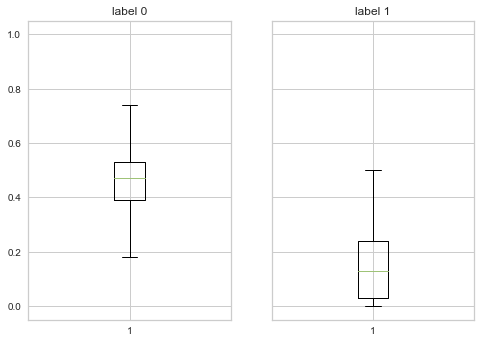

In [146]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
x0= wines_0["citric acid"]
x1= wines_1["citric acid"]
ax1.boxplot(x0)
ax1.set_title('label 0')
ax2.boxplot(x1)
ax2.set_title('label 1')

In [96]:
# columns that differ between the clusters
column = ["fixed acidity", "citric acid", "total sulfur dioxide", "pH", "sulphates", "clusters"]

In [145]:
wine_new = wines[column]
wine_new[:2]

,fixed acidity,citric acid,total sulfur dioxide,pH,sulphates,clusters
0,7.4,0.0,34.0,3.51,0.56,1
1,7.8,0.0,67.0,3.20,0.68,1


In [141]:
wine_new.groupby('clusters').mean() #how our clusters' main differences are distributed

,fixed acidity,citric acid,total sulfur dioxide,pH,sulphates
clusters,,,,,
0,9.962832,0.463912,35.438938,3.203416,0.738531
1,7.355000,0.151553,45.220213,3.381340,0.605574


In [ ]:
#table above shows the main differences between the clusters 0 and 1.
# Cluster 0 has higher average fixed acidity, citric acid contents, and sulphates levels compared to cluster 1.
# Cluster 1 has higher total sulfur dioxide and pH levels 

In [ ]:
# we can also look deeper at any particular column. 

In [144]:
#let's take a closer look at citric acid feature. 
a = wines.groupby(['clusters'])['citric acid'].value_counts() 
b = a.to_frame("counts").reset_index()
b.set_index("citric acid", inplace=True)
b.groupby('clusters').counts.nlargest(10)
#here we can tell cluster 0 wines contain higher amounts of citric acid in them. 

clusters  citric acid
0         0.49            55
          0.40            23
          0.42            23
          0.45            22
          0.39            21
          0.24            19
          0.48            18
          0.44            16
          0.47            16
          0.52            16
1         0.00           128
          0.02            48
          0.10            34
          0.08            33
          0.01            32
          0.03            30
          0.09            30
          0.24            30
          0.04            29
          0.21            26
Name: counts, dtype: int64

In [143]:
pd.crosstab(wines["citric acid"],wines["clusters"]) # we can tell cluster 1 wines contain less citric acid. 

clusters,0,1
citric acid,,
0.00,0,128
0.01,0,32
0.02,0,48
0.03,0,30
0.04,0,29
0.05,0,20
0.06,0,24
0.07,0,22
0.08,0,33
